<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA204: Introduction to Statistics, Homework</center>
<center>Adithya Ravichandran</center>
<br>

# MAA204 Homework 2022/23

In [11]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import pandas as pd
import scipy

from math import * # package for mathematics (pi, arctan, sqrt, factorial ...)
from scipy import stats

## Exercise 1 Part 1

&nbsp;

<img src="./figures/Ex1pt1.png" alt="Roots" style="width: 900px;"/>

&nbsp;

In [9]:
#read data
exp_data = pd.read_csv("exponential.csv")


### Question 1

<div markdown=1 class="Answer"> 

Mean calculation:


\begin{align}
\mathbb{E}(X) &= \int_{0}^{\infty} \frac{x}{m}e^{-\frac{x}{m}} dx \\
&=  \int_{0}^{\infty} -me^{-\frac{x}{m}} \\
&= m \\
&= \frac{1}{\lambda}
\end{align}

Variance calculation:


\begin{align}
Var(X) &= \int_{0}^{\infty} \frac{x^2}{m}e^{-\frac{x}{m}} dx \\
&=  \int_{0}^{\infty} -2m^2e^{-\frac{x}{m}} \\
&= m^2 \\
&= \frac{1}{\lambda^2}
\end{align}




### Question 2

<div markdown=1 class="Answer"> 

\begin{align}
L(\lambda, x_1, x_2, \dots , x_N ) &= \prod_{i=1}^{N} f_X(x_i) \\
&= \frac{1}{m^N} e^{-\frac{1}{m} \sum_{i=1}^{N} x_i}\\
&= \lambda^N e^{-\lambda \sum_{i=1}^{N} x_i} \\
\end{align}


In log scale, we have:



\begin{align}
l_N(\lambda) &= ln(\lambda^N) + ln(e^{-\lambda \sum_{i=1}^{N} x_i}) \\
&= Nln(\lambda) - \lambda\sum_{i=1}^{N} x_i \\
l_N'(\lambda) &= \frac{N}{\lambda} - \sum_{i=1}^{N} x_i\\
\end{align}

Setting the derivative to $0$:

\begin{align}
\frac{N}{\lambda} = \sum_{i=1}^{N} x_i\\
\end{align}

Then, we can calculate $\hat{m}_{ML} = \frac{1}{\hat{\lambda}} = \sum_{i=1}^{N} x_i = \bar{X}$ and $\hat{\lambda} = \frac{1}{\bar{X}}$.

We hence notice that $\hat{m}_{ML}$ is equal to the mean of the dataset


### Question 3

<div markdown=1 class="Answer"> 

We can first compute whether the estimator is biased:

\begin{align}
B(\hat{m}_{ML}) &= \mathbb{E}(\hat{m}_{ML}) - m \\
&= \frac{1}{N}\sum_{i=1}^{N}\mathbb{E}(X_i) - \mathbb{E}(X) \\
&= 0 \\
\end{align}

Then let us compute the quadratic risk. We have that:

\begin{align}
R(\hat{m}_{ML}) &= B^2(\hat{m}_{ML}) + Var(\hat{m}_{ML}) \\
&= Var(\frac{1}{N}\sum_{i=1}^{N}X_i) \\
&= N\cdot Var(\frac{1}{N}X) \\
&= \frac{m^2}{N} \\
\end{align}

### Question 4

<div markdown=1 class="Answer">

/home/erikdz/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean of exponential distribution:  x    0.325629
dtype: float64


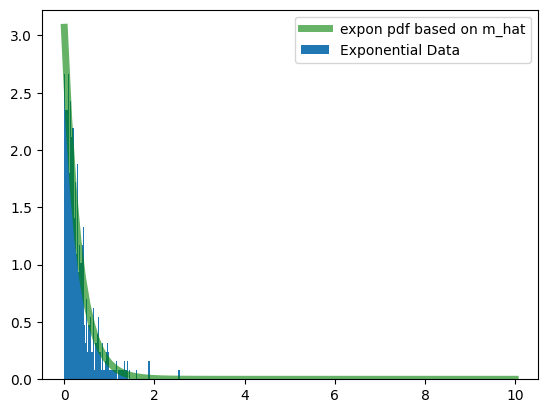

In [12]:
import numpy as np
#mean of dataset
m_hat = np.mean(exp_data)
print("Mean of exponential distribution: ", m_hat)
#plot the pdf
x = np.linspace(0, 10, 100)
plt.plot(x, stats.expon.pdf(x, scale = m_hat), 'g-', lw=5, alpha=0.6, label='expon pdf based on m_hat')
plt.hist(exp_data, bins=100, density=True, label="Exponential Data")

plt.legend()
plt.show()

### Question 5

<div markdown=1 class="Answer"> 

We can compute that for $y\geq0$:


\begin{align}
\mathbb{P}(M_N \leq y) &= 1- \mathbb{P}(M_N > y)\\
&= 1- \mathbb{P}(X_1 > y \cap X_2 > y \cap \dots \cap X_n > y )\\
&= 1- \prod_{i=1}^{n}\mathbb{P}(X_i > y)\\
&= 1- \prod_{i=1}^{n} (1 - \int_{0}^{y}\frac{1}{m}e^{-\frac{t}{m}} dt) \\
&= 1- (1 - \int_{0}^{y}\frac{1}{m}e^{-\frac{t}{m}} dt)^n \\
&= 1- (1 - (1-e^{-\frac{y}{m}}))^n \\
&= 1-e^{-\frac{yn}{m}} \\
\end{align}

For $y\leq0$:

\begin{align}
\mathbb{P}(M_N \leq y) &= 0\\
\end{align}

Then the p.d.f is the following:

\begin{align}
f_{M_n}(y) &= \frac{n}{m}e^{-\frac{yn}{m}}\\
\end{align}

### Question 6

<div markdown=1 class="Answer">

We can first compute whether the estimator is biased:

\begin{align}
B(Y_n) &= \mathbb{E}(Y_n) - m \\
\end{align}

Then, we have:

\begin{align}
\mathbb{P}(Y_n\leq y) &= \mathbb{P}(nM_n\leq y) \\
&= \mathbb{P}(M_n\leq \frac{y}{n}) \\
&= 1-e^{-\frac{yn}{m}} \\
\end{align}

Then, $f_{Y_n}(y) = \frac{1}{m}e^{-\frac{yn}{m}} \implies Y_n \sim exp(\frac{1}{m})$.

Hence, we have that $B(Y_n) = \mathbb{E}(Y_n) - m = 0$.

Then let us compute the quadratic risk. We have that:

\begin{align}
R(Y_n) &= Var(Y_n) \\
&= m^2 \\
\end{align}

## Exercise 1 Part 2

&nbsp;

<img src="./figures/Ex1pt2.png" alt="Roots" style="width: 900px;"/>

&nbsp;

### Question 7

<div markdown=1 class="Answer"> 

Use the ML maximum likelihood estimator as the risk of ML converges faster to 0 and is hence minimised.

### Question 8

<div markdown=1 class="Answer"> 

We can first compute $\bar{V_n}$:

\begin{align}
\bar{V_n} &= \frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X_n})^2 \\
&= (\frac{1}{n}\sum_{i=1}^{n}(X_i^2)) - (\bar{X_n})^2\\
\end{align}

The following limits will represent convergences in probability.

Then, as $\lim_{x\to\infty} \bar{X_n} = \mathbb{E}(X_1)$ and $x\mapsto x^2$ is  continuous,
therefore we have $\lim_{n\to\infty} \bar{X_n^2} = \mathbb{E}(X_1)^2$.

Then, by defining $Y_i=X_i^2$, 

$\lim_{n\to\infty} \frac{1}{n}\sum_{i=1}^{n}Y_i = \mathbb{E}(Y_1)$, 
which is equivalent to $\lim_{n\to\infty} \frac{1}{n}\sum_{i=1}^{n}X_i^2 = \mathbb{E}(X_1^2)$.

Hence,

$\lim_{n\to\infty} \bar{V_n} = \lim_{n\to\infty} \frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X_n})^2 = \mathbb{E}(X_1^2)- \mathbb{E}(X_1)^2 = Var(X_1)$

### Question 9

<div markdown=1 class="Answer"> 

From the central limit theorem:

$\lim_{n\to\infty} Z_n = \lim_{n\to\infty} \sqrt{n}\cdot (\frac{\hat{m}_{ML}-m}{\sqrt{\bar{V_n}}}) \sim \mathcal{N}(0,1)$

### Question 10

<div markdown=1 class="Answer">



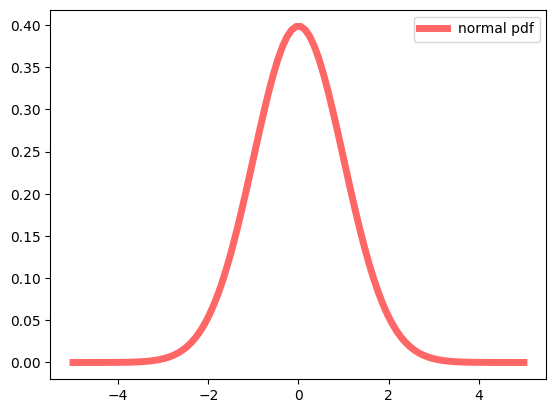

In [13]:
#simulate central limit theorem with z_n = sqrt(n)*(m_hat - m)/sqrt(empirical variance)
n = 10**5
#m_hat is the mean of the data of vector size n
m_hat = np.mean(exp_data)
m = 0.3
z_n = np.sqrt(n)*(m_hat - m)/np.sqrt(np.var(exp_data))
#plot the pdf
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, scale = 1), 'b-', lw=5, alpha=0.6, label='normal $f_X(x)$')
plt.legend()
plt.show()

### Question 11

<div markdown=1 class="Answer">

The quantile function of $X\sim\mathcal{N}(0,1)$ is

$$
Q_X(p) = \sqrt{2} \cdot \mathrm{erf}^{-1}(2p-1)
$$

where $\mathrm{erf}^{-1}(x)$ is the inverse error function.


**Proof:** The cumulative distribution function of the normal distribution is:

$$
F_X(x) = \frac{1}{2} \left[ 1 + \mathrm{erf}\left( \frac{x}{\sqrt{2}} \right) \right] \; .
$$

Because the cumulative distribution function (CDF) is strictly monotonically increasing, the quantile function is equal to the inverse of the CDF:

$$ \label{eq:norm-qf-s1}
Q_X(p) = F_X^{-1}(x) \; .
$$

This can be derived by rearranging equation the normal distribution cdf equation:

$$
\begin{split}
p &= \frac{1}{2} \left[ 1 + \mathrm{erf}\left( \frac{x}{\sqrt{2}} \right) \right] \\
2 p - 1 &= \mathrm{erf}\left( \frac{x}{\sqrt{2}} \right) \\
\mathrm{erf}^{-1}(2p-1) &= \frac{x}{\sqrt{2}} \\
x &= \sqrt{2} \cdot \mathrm{erf}^{-1}(2p-1) \; .
\end{split}
$$

Now, using this fact, we can compute the interval $I$ such that $Q_X(1-\frac{\alpha}{2}) = \sqrt{2} \cdot \mathrm{erf}^{-1}(1-\alpha)$:

$I = \left[\hat{m}_{ML} - Q_X(1-\frac{\alpha}{2})\sqrt{\frac{\bar{V_n}}{n}} , \hat{m}_{ML} + Q_X(1-\frac{\alpha}{2})\sqrt{\frac{\bar{V_n}}{n}} \right]$

## Exercise 2

&nbsp;

<img src="./figures/Ex2.png" alt="Roots" style="width: 900px;"/>

&nbsp;

### Question 7

<div markdown=1 class="Answer"> 

### Question 8

<div markdown=1 class="Answer"> 

### Question 9

<div markdown=1 class="Answer"> 

### Question 10

In [ ]:
#compute P(X<2) where X follows a normal distribution with mean 2.5 and variance 1/80
#using the cdf
stats.norm.cdf(2, loc = 2.5, scale = np.sqrt(5)/20)


: 

<div markdown=1 class="Answer"> 

### Question 11

<div markdown=1 class="Answer">

In [ ]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()

: 

: 

: 